<a href="https://colab.research.google.com/github/Pavan042/Employee-Attrition/blob/main/Employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset
df= pd.read_csv("/content/drive/MyDrive/Mini project - employee attrition/train_employee_attrition.csv")
attrition = df.copy()
attrition.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [ ]:
#quick look at our data types & null counts
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [ ]:
# check null value
attrition.isnull().any()

id                          False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

In [ ]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,...,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000
mean,36.036971,892.749553,8.683959,2.937984,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,...,0.042338,0.205128,0.211688,0.045915,0.194991,0.460942,0.344067,1.0,0.761479,0.238521
std,8.507112,374.496259,7.826143,1.039078,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,...,0.201418,0.403916,0.408626,0.209364,0.396312,0.498621,0.475205,0.0,0.426306,0.426306
min,18.000000,107.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,30.000000,589.000000,2.000000,2.000000,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
50%,35.000000,890.000000,7.000000,3.000000,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000
75%,41.000000,1223.000000,12.000000,4.000000,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,60.000000,3921.000000,29.000000,15.000000,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [ ]:

attrition['StandardHours']

0       80
1       80
2       80
3       80
4       80
        ..
1672    80
1673    80
1674    80
1675    80
1676    80
Name: StandardHours, Length: 1677, dtype: int64

In [ ]:
attrition['EmployeeCount']
attrition['EmployeeCount'].min()
attrition['EmployeeCount'].max()

1

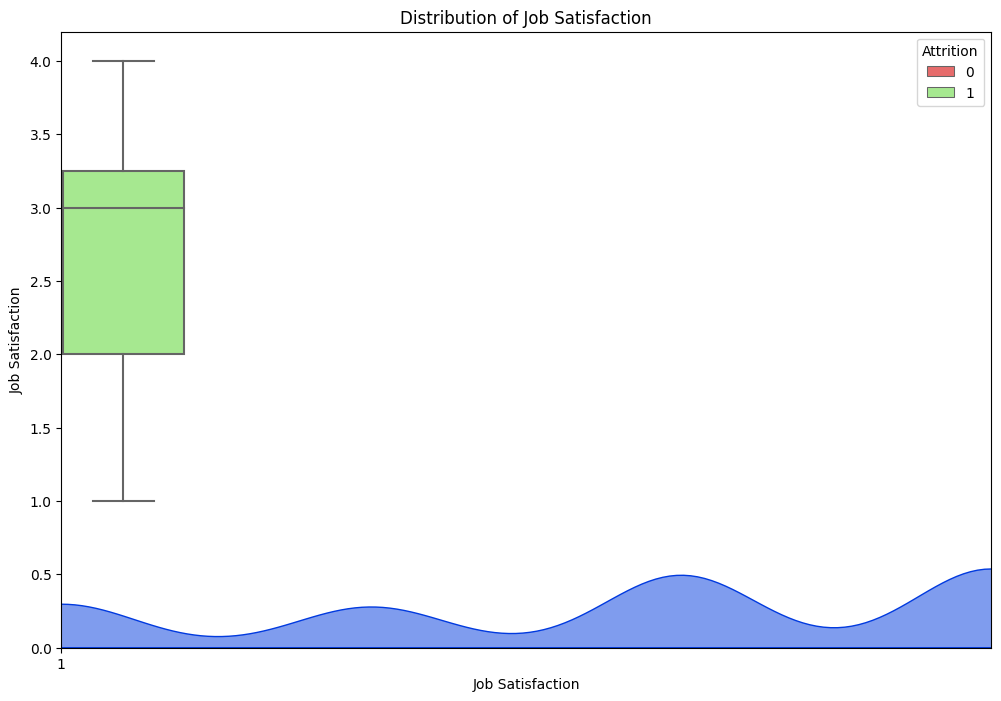

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

box_attrition = sns.boxplot(data=df[['Attrition', 'JobSatisfaction', 'Gender']],   x='Attrition', y='JobSatisfaction', hue='Attrition', palette=['#FA5858', '#9FF781'])
box_attrition.set(xlabel='Attrition', ylabel='Job Satisfaction')
box_attrition.set_title('Attrition vs Job Satisfaction by Gender')

dist_satisfaction = sns.kdeplot(data=df['JobSatisfaction'], color='#013ADF', fill=True, alpha=0.5)
dist_satisfaction.set(xlabel='Job Satisfaction')
dist_satisfaction.set_title('Distribution of Job Satisfaction')
dist_satisfaction.set_xlim([1, 4])

fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

In [ ]:
attrition = attrition.drop(["id","StandardHours","EmployeeCount"],axis = 1)

In [ ]:
# getting categorical and numerical columns
cat_cols = attrition.select_dtypes(exclude='number').columns.to_list()
num_cols = attrition.select_dtypes(include='number').columns.to_list()
print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical Columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


<Axes: >

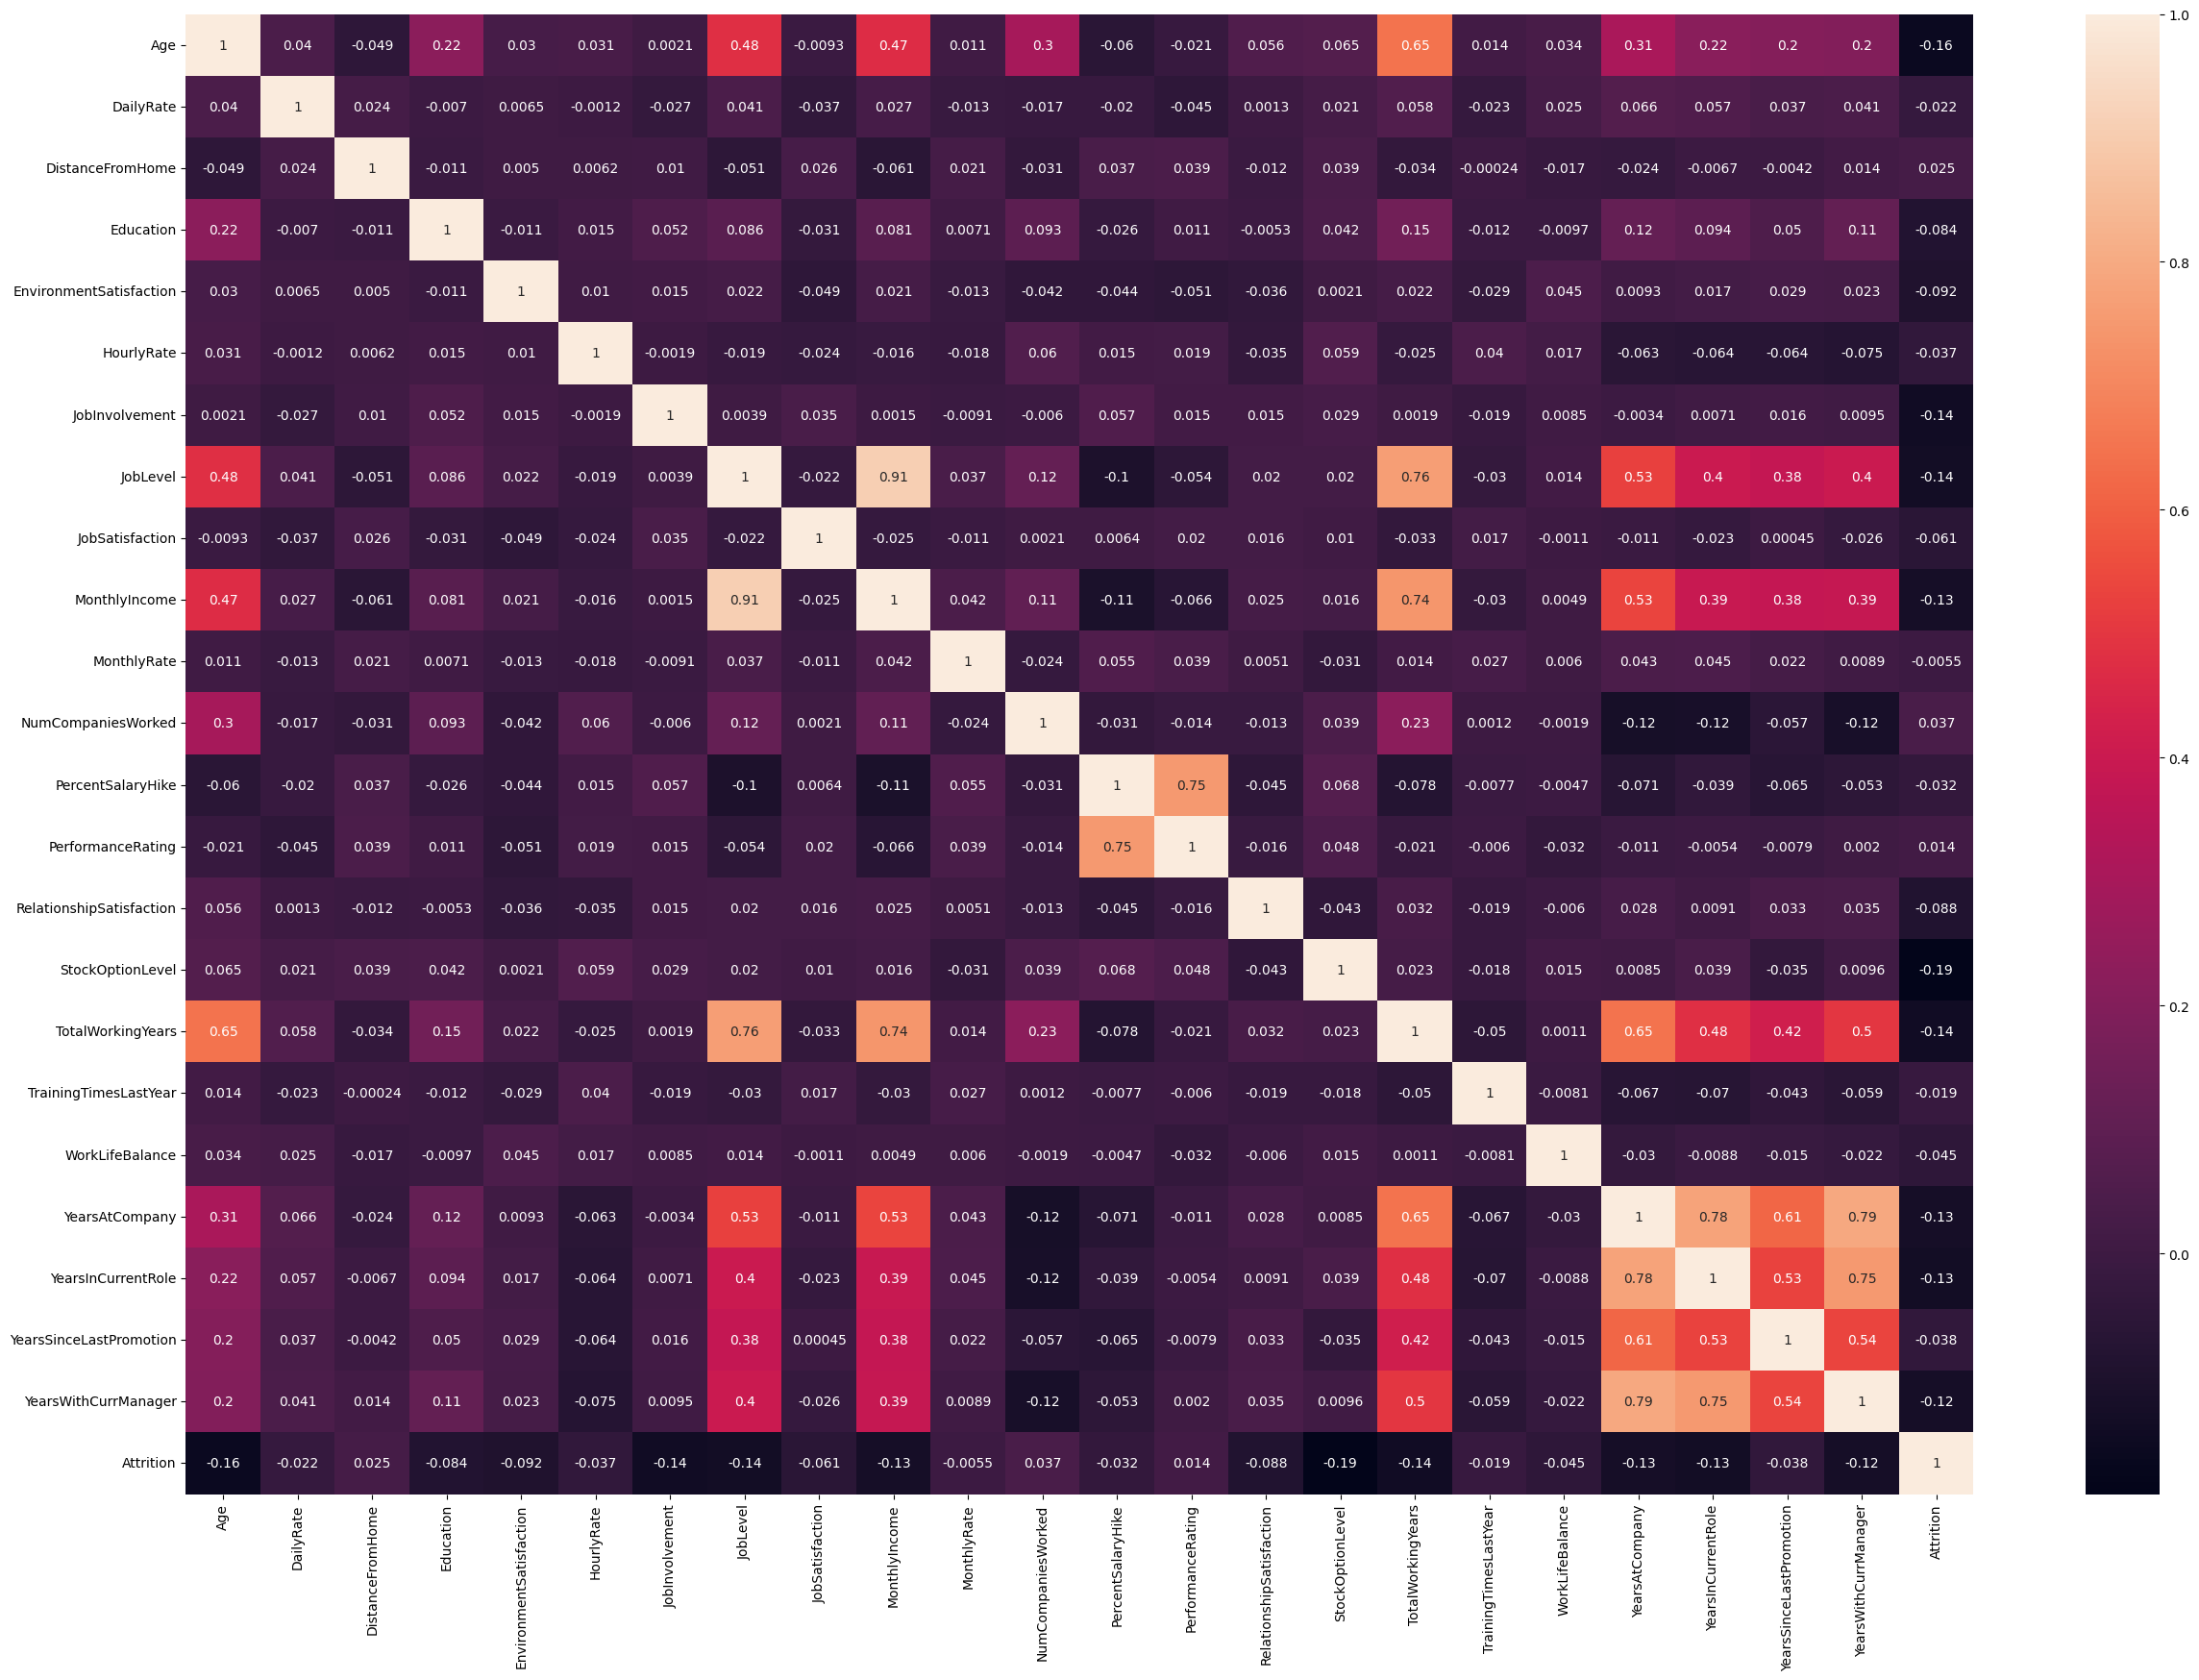

In [ ]:
 # correlation value varies between -1 and 1


# correlation value between -1 and -0.5 signifies high negative correlation or inverse relationship
# correlation value between -0.5 and 0.5 signifies no correlation
# correlation value between 0.5 and 1 signifies high positive correlation or proportional relationship

# correlation value between -1 and -0.8 signifies high negative correlation or inverse relationship
# correlation value between -0.8 and 0.8 signifies no correlation
# correlation value between 0.8 and 1 signifies high positive correlation or proportional relationship
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
attrition[numerical].corr()
plt.figure(figsize=(30,20))
sns.heatmap(attrition[numerical].corr(),annot=True)


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>],
       [<Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,

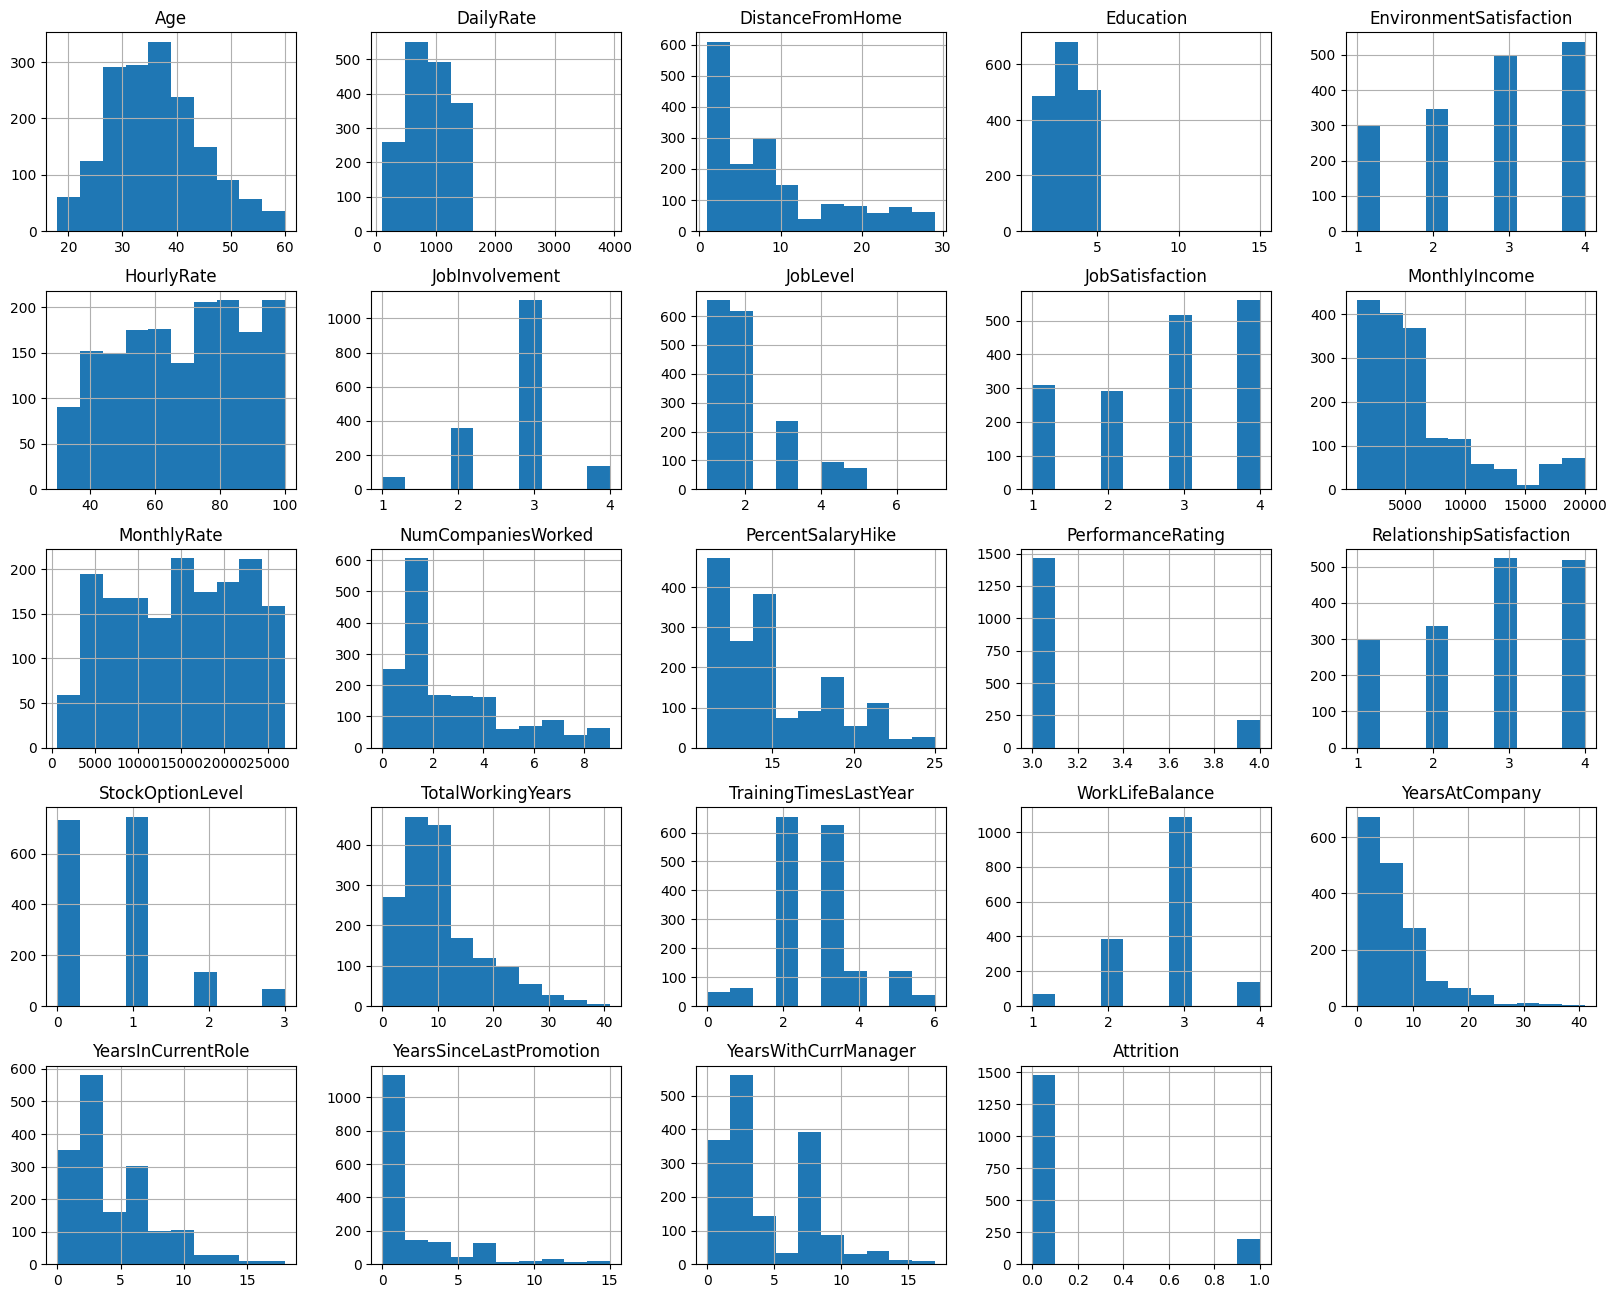

In [ ]:
# hist plot of numerical columns
attrition[numerical].hist(figsize=(20,16))

In [ ]:
# check the unique values of target variable
attrition['Attrition'].unique()

array([0, 1])

In [ ]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
#
attrition = pd.get_dummies(attrition)

In [ ]:
attrition.shape

(1677, 53)

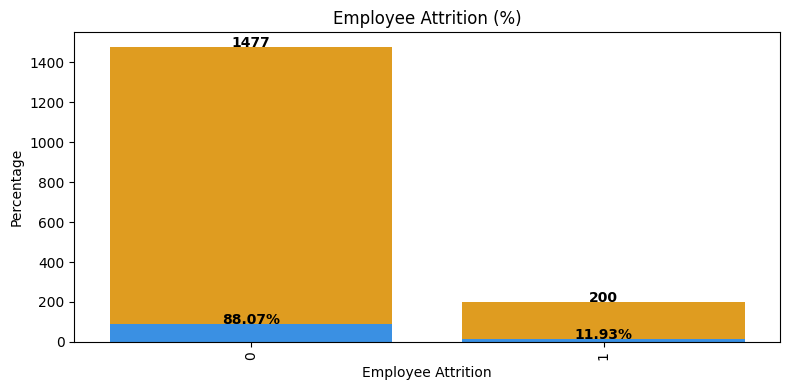

In [ ]:
#sns.countplot(data= attrition,x='Attrition');
#plt.title('Attrition Ratio',fontsize=20);
# set the plot size
plt.figure(figsize=(8, 4))

# create a bar plot for count of attritions
attritions_number = attrition.groupby('Attrition').size().reset_index(name='Count')
attrition_bar = sns.barplot(x='Attrition', y='Count', data=attritions_number, color='orange')

# add labels to the bar plot
for index, row in attritions_number.iterrows():
    attrition_bar.text(row.name, row.Count, row.Count, color='black', ha="center", fontsize=10, fontweight='bold')

attrition_bar.set(title='Employee Attrition (Amount)', xlabel='Employee Attrition', ylabel='Amount')
attrition_bar.set_xticklabels(attrition_bar.get_xticklabels(), rotation=90, ha="center")

# create a bar plot for attrition percentage
attrition_percentage = attrition.groupby('Attrition').size().reset_index(name='Count')
attrition_percentage['pct'] = round(attrition_percentage['Count'] / attrition_percentage['Count'].sum() * 100, 2)
attrition_pct_bar = sns.barplot(x='Attrition', y='pct', data=attrition_percentage, color='dodgerblue')

# add labels to the bar plot
for index, row in attrition_percentage.iterrows():
    attrition_pct_bar.text(row.name, row.pct, str(row.pct) + '%', color='black', ha="center", fontsize=10, fontweight='bold')

attrition_pct_bar.set(title='Employee Attrition (%)', xlabel='Employee Attrition', ylabel='Percentage')
attrition_pct_bar.set_xticklabels(attrition_pct_bar.get_xticklabels(), rotation=90, ha="center")

# display the plots side by side
plt.tight_layout()
plt.show()

Distribution of our Labels:
This is an important aspect that will be further discussed in this kernel and that is dealing with imbalanced dataset. 84% of employees did not quit the organization while 16% did leave the organization. Knowing that we are dealing with an imbalanced dataset will help us determine what will be the best approach to implement our predictive model

Note: I am aware the dataset is slightly imbalanced which could make our DecisionTree to make wrongly assumptions. I will work on a oversampling technique further in the future to deal with this problem.

In [ ]:
# Separating features & Target
X, y = attrition.drop("Attrition",axis=1),attrition["Attrition"]

In [ ]:
X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [ ]:
X.shape

(1677, 52)

In [ ]:
y.shape

(1677,)

In [ ]:
# Splitting the data into training data & Test data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=123)

**SMOTE to oversample due to the skewness in target**

Since we have already noted the severe imbalance in the values within the target variable, let us implement the SMOTE method in the dealing with this skewed value via the imblearn Python package.

In [ ]:
# this techniques used for  imbalance dataset to balance dataset
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
x_train,y_train = oversampler.fit_resample(x_train,y_train)

In [ ]:
x_train.shape

(2370, 52)

In [ ]:
 x_val.shape

(336, 52)

In [ ]:
y_train.shape

(2370,)

<Axes: >

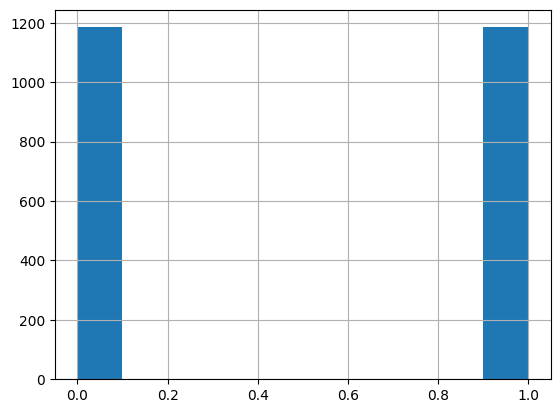

In [ ]:
y_train.hist()

## **Ensemble Learning and Random Forests**
A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

For example, you can train a group of Decision Tree classifiers, each on a different random subset of the training set.

To make predictions,

* **You just obtain the predictions of all individual trees,**

* **then predict the class that gets the most votes.**

Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today.
 * **A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.**

Ensemble methods work best when the predictors are

* **As independent from one another as possible.**
* **One way to get diverse classifiers is to train them using very different algorithms.**
* **This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.**

Let's train a voting classifier and check if it performs better than the individual classifiers

In [ ]:
# Hard voting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
# check accuracy of votingclassifier
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.6220238095238095
RandomForestClassifier 0.8452380952380952
SVC 0.6160714285714286
VotingClassifier 0.7559523809523809


#### **Hard voting and Soft voting**

* If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called soft voting.

* It often achieves higher performance than hard voting because it gives more weight to highly confident votes. All you need to do is replace voting="hard" with voting="soft" and ensure that all classifiers can estimate class probabilities.

* This is not the case of the SVC class by default, so you need to set its probability hyperparameter to True (this will make the SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method).


In [ ]:
# Soft voting
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.6220238095238095
RandomForestClassifier 0.8452380952380952
SVC 0.6160714285714286
VotingClassifier 0.8184523809523809


#### **Bagging and Pasting**

* One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed.

* Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

* When sampling is performed with replacement, this method is called bagging (short for bootstrap aggregating2).

* When sampling is performed without replacement, it is called pasting.

**In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictorBagging and Pasting
One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed.**

* Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors.

* The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression.

**Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.**

The following code trains an ensemble of 500 Decision Tree classifiers, each trained on 100 training instances randomly sampled from **the training set with replacement (this is an example of bagging, but if you want to use pasting instead, just set bootstrap=False).**

**The n_jobs parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores):**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=300,
    bootstrap=False,
    n_jobs=-1
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_val)
accuracy_score(y_pred, y_val)

0.8452380952380952

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_val)
print(accuracy_score(y_val, y_pred_tree))

0.7797619047619048


#### **Out of Bag Evaluation**

With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set

This means that only about 63% of the training instances are sampled on average for each predictor. As m grows, this ratio approaches 1 – exp(–1) ≈ 63.212%. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.

**Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation. You can evaluate the ensemble itself by averaging out the oob evaluations of each predictor. In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to request an automatic oob evaluation after training.**

The following code demonstrates this. The resulting evaluation score is available through the oob_score_ variable:

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.9459915611814346

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(x_val)
accuracy_score(y_val, y_pred)

0.8660714285714286

In [ ]:
bag_clf

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
bag_clf.oob_decision_function_

array([[0.89325843, 0.10674157],
       [0.95555556, 0.04444444],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.17241379, 0.82758621],
       [0.        , 1.        ]])

## Random Forest

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [ ]:
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_val)

In [ ]:
accuracy_score (y_val,y_pred )

0.8660714285714286

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, oob_score=True, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_val)

In [ ]:
accuracy_score (y_val,y_pred_rf )

0.8422619047619048

## Extra trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree_clf = ExtraTreesClassifier(n_estimators=195, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_tree_clf.fit(x_train, y_train)
y_pred_extra_trees = extra_tree_clf.predict(x_val)

In [ ]:
accuracy_score(y_pred_extra_trees, y_pred)

0.9523809523809523

## Feature Importances

In [ ]:
for name, score in zip(attrition[attrition.columns], rnd_clf.feature_importances_):
    print(name, score)

Age 0.021952089407233137
DailyRate 0.0032141620962952686
DistanceFromHome 0.003573436768080998
Education 0.03111282122633091
EnvironmentSatisfaction 0.0587981425461065
HourlyRate 0.009188072959390253
JobInvolvement 0.07350287322511306
JobLevel 0.02349622920915187
JobSatisfaction 0.027461681863388716
MonthlyIncome 0.035662915205605085
MonthlyRate 0.00646847258875549
NumCompaniesWorked 0.0025121550009243364
PercentSalaryHike 0.004821139523341424
PerformanceRating 0.0009450143504685542
RelationshipSatisfaction 0.024859639483168102
StockOptionLevel 0.1660746540159626
TotalWorkingYears 0.01914098389466515
TrainingTimesLastYear 0.0034298921360470416
WorkLifeBalance 0.0019947479248457072
YearsAtCompany 0.016634023139786687
YearsInCurrentRole 0.029092064821660803
YearsSinceLastPromotion 0.001047518886569173
YearsWithCurrManager 0.020289284343850023
Attrition 0.0023036206492821443
BusinessTravel_Non-Travel 0.0004499536871519684
BusinessTravel_Travel_Frequently 0.005389143484087791
BusinessTrave

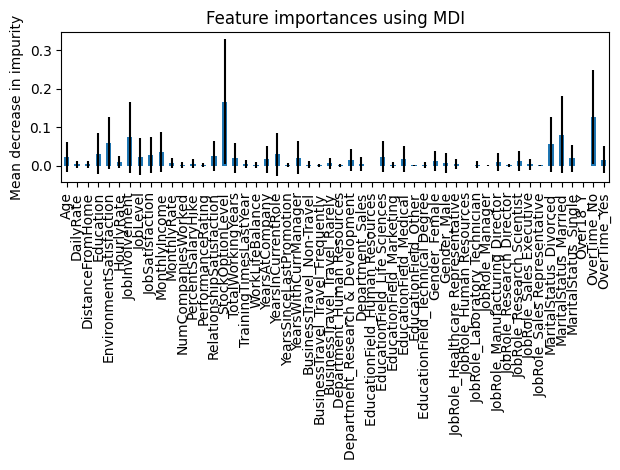

In [ ]:
import pandas as pd
std = np.std([tree.feature_importances_ for tree in rnd_clf.estimators_], axis=0)
forest_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,20)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
xgbc = XGBClassifier()
rf = RandomForestClassifier()
sgd = SGDClassifier()
xgbc.fit(x_train, y_train)
rf.fit(x_train, y_train)
sgd.fit(x_train, y_train)

SGDClassifier()

In [ ]:
y_predict = xgbc.predict(x_val)
rf_y_predict = rf.predict(x_val)
sgd_y_predict = sgd.predict(x_val)

print(" -- accuracy_score ---")
print(accuracy_score(y_val, y_predict))
print(accuracy_score(y_val, rf_y_predict))
print(accuracy_score(y_val, sgd_y_predict))

 -- accuracy_score ---
0.8601190476190477
0.8541666666666666
0.13095238095238096


In [ ]:
# RandomForestClassifier classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

In [ ]:
seed = 0
rf_params = {'n_jobs': -1,'n_estimators': 1000,
             'max_features': 0.3,'max_depth': 4,'min_samples_leaf': 2,
             'max_features' : 'sqrt','random_state' : seed,'verbose': 0}
rf = RandomForestClassifier(**rf_params)

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=1000,
                       n_jobs=-1, random_state=0)

In [ ]:
rf_predictions = rf.predict( x_val)

##Measuring accuracy using Precision, Recall and F1 score

True - Positive means the classifier correctly classified the Positive class.

True - Negative means the classifier correctly classified the Neative class.

False - Positive means the classifier incorrectly classified a Negative class as Positive Class.

False - Negative means the classifier incorrectly classified a Positive class as Negative Class.
## F1score
It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is the harmonic mean of precision and recall.

F1 score

2/F1 = 1/recall + 1/precision

f1/2 < smaller of recall and precision

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_val, rf_predictions)))
print("="*80)
print(classification_report(y_val, rf_predictions))

Accuracy score: 0.8363095238095238
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       292
           1       0.39      0.45      0.42        44

    accuracy                           0.84       336
   macro avg       0.65      0.67      0.66       336
weighted avg       0.85      0.84      0.84       336



Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

True Positives (TP) = 291

True Negatives (TN) = 1

False Positives (FP) = 1

False Negatives (FN) = 43

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, rf_predictions)

array([[261,  31],
       [ 24,  20]])

## Decission tree

Terms to Know:

 * **Gene Impurity:**
 If all the training instances belong to the same class the impurity of a specific node will be equivalent to zero. For instance, let's assume that all employee who had a WorkLifeBalance  <
  2, decided to leave the organization. In this case the impurity will also be zero.

 * Calculating Impurity:


Gi=1−∑k=1np1,k2

where:
p,i,k is the ratio of class k instances in the ith node.

 * **Classification and Regression Tree (CART) algorithm:**
  The main idea of this concept is to split the training set into two smaller subsets and create a conditional statement using one feature. (For instance, MonthlyIncome  <
  25k). How does the algorithm determines the conditional statement? It looks for the conditional statement that creates the "purest" subset (remember impurity = 0 or in this case the lowest impurity).

 * **Formula of the CART Training Algorithm (Finding our threshold for each feature):**

J(k,tk)=mleftmGleft+mrightmGright

where:

 Gleft/right
   = determines the impurity of both subsets.
 mleft/right
   = total number of instances on each subset.

   **The DecisionTree Model considers these five attributes as the most important:**

* Monthly income (Income might be a determinant factor for employees to leave the organization)

* Job Role (Employees who do not like their current Job Positions).

* Job Level (Employees who believe they deserve a higher job level are prone to leaving the organization).

* Overtime (Working Over time affects the quality of life of an employee)

* Total Working Years (A portion might be retiring or looking for more challenges


In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred = decision_tree.predict(x_val)

In [ ]:
print("Accuracy score: {}".format(accuracy_score(y_val, rf_predictions)))
print("="*80)
print(classification_report(y_val, y_pred))

Accuracy score: 0.8363095238095238
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       292
           1       0.33      0.50      0.40        44

    accuracy                           0.80       336
   macro avg       0.62      0.67      0.64       336
weighted avg       0.84      0.80      0.82       336



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[247,  45],
       [ 22,  22]])

In [ ]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re


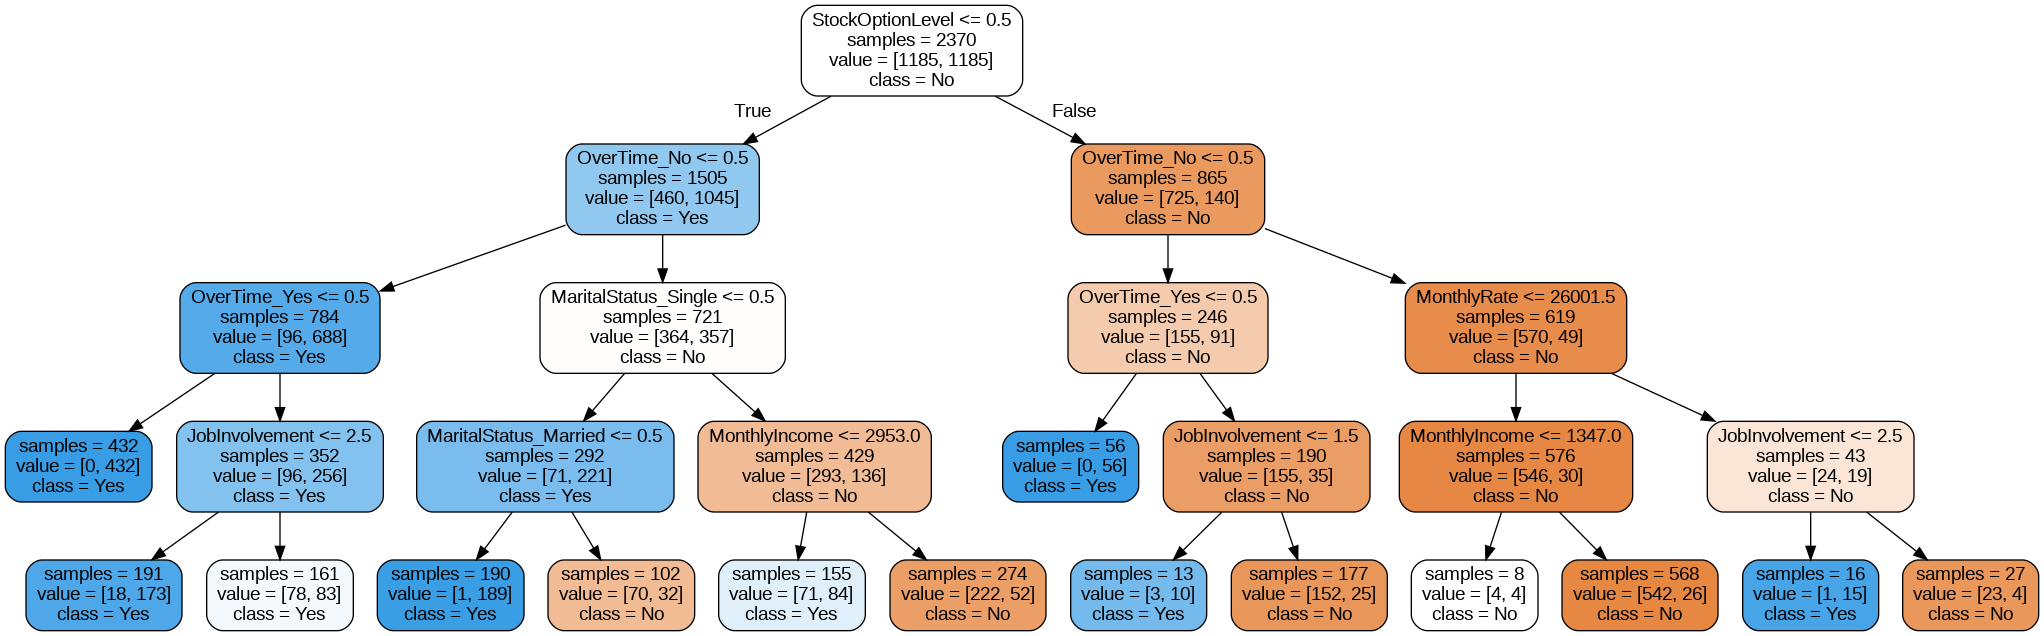

In [ ]:
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False, feature_names = X.columns.values,class_names = ['No', 'Yes'],rounded = True,filled= True )

#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png", height=500, width=2400)


In [ ]:
import xgboost
from xgboost import XGBClassifier

In [ ]:
attrition.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRol

In [ ]:
model2  =  decision_tree.fit(X,y)

[Text(0.5, 0.9, 'StockOptionLevel <= 0.5\ngini = 0.21\nsamples = 100.0%\nvalue = [0.881, 0.119]'),
 Text(0.25, 0.7, 'MonthlyIncome <= 2697.5\ngini = 0.331\nsamples = 43.6%\nvalue = [0.791, 0.209]'),
 Text(0.125, 0.5, 'RelationshipSatisfaction <= 3.5\ngini = 0.486\nsamples = 9.6%\nvalue = [0.584, 0.416]'),
 Text(0.0625, 0.3, 'JobRole_Sales Executive <= 0.5\ngini = 0.5\nsamples = 6.8%\nvalue = [0.509, 0.491]'),
 Text(0.03125, 0.1, 'gini = 0.493\nsamples = 5.8%\nvalue = [0.561, 0.439]'),
 Text(0.09375, 0.1, 'gini = 0.305\nsamples = 1.0%\nvalue = [0.188, 0.812]'),
 Text(0.1875, 0.3, 'MonthlyRate <= 22399.5\ngini = 0.359\nsamples = 2.8%\nvalue = [0.766, 0.234]'),
 Text(0.15625, 0.1, 'gini = 0.234\nsamples = 2.2%\nvalue = [0.865, 0.135]'),
 Text(0.21875, 0.1, 'gini = 0.48\nsamples = 0.6%\nvalue = [0.4, 0.6]'),
 Text(0.375, 0.5, 'Over18_Y <= 0.5\ngini = 0.256\nsamples = 34.0%\nvalue = [0.849, 0.151]'),
 Text(0.3125, 0.3, 'JobInvolvement <= 2.5\ngini = 0.408\nsamples = 8.3%\nvalue = [0.714, 0.

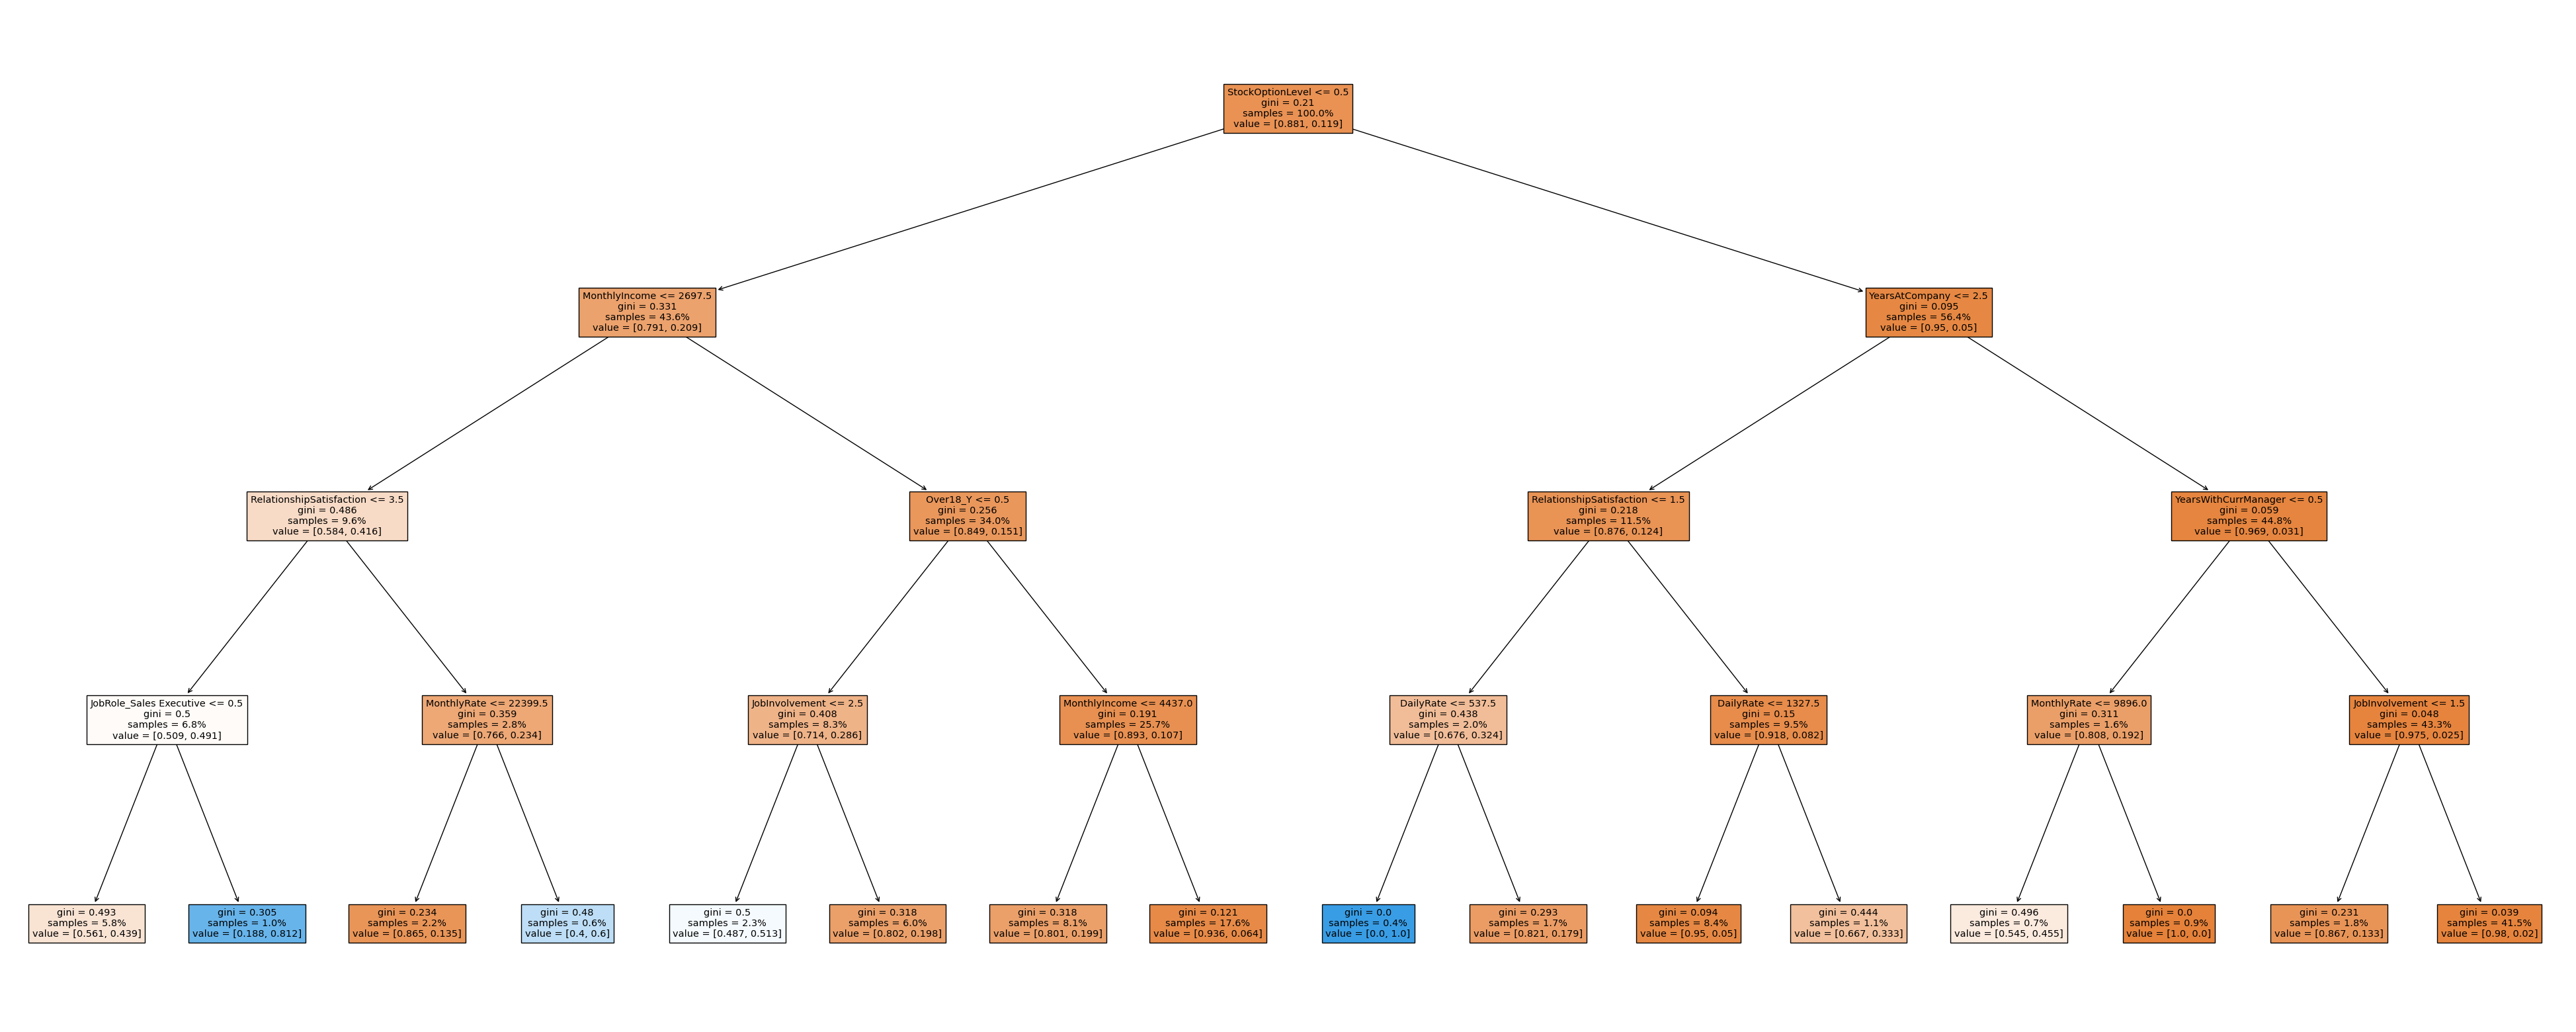

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(50,20))

plot_tree(model2, feature_names=['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_No', 'OverTime_Yes'],
                   filled=True, proportion= True)

In [ ]:
## practice
practice_param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

count = 0;
for i in [3, 10, 30]:
    for j in  [2, 4, 6, 8]:
        print(" I am goin to try %d <> %d" % (i, j) )
        count += 1
        #cross validation -

for k in [False]:
    for i in [3, 10]:
        for j in  [2, 3, 4]:
            print(" I am goin to try %d <> %d <> %s" % (i, j, k) )
            count += 1
print(count)

 I am goin to try 3 <> 2
 I am goin to try 3 <> 4
 I am goin to try 3 <> 6
 I am goin to try 3 <> 8
 I am goin to try 10 <> 2
 I am goin to try 10 <> 4
 I am goin to try 10 <> 6
 I am goin to try 10 <> 8
 I am goin to try 30 <> 2
 I am goin to try 30 <> 4
 I am goin to try 30 <> 6
 I am goin to try 30 <> 8
 I am goin to try 3 <> 2 <> False
 I am goin to try 3 <> 3 <> False
 I am goin to try 3 <> 4 <> False
 I am goin to try 10 <> 2 <> False
 I am goin to try 10 <> 3 <> False
 I am goin to try 10 <> 4 <> False
18


## Hypereperameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'learning_rate': [0.1, 0.3],
     'min_child_weight': [0.5, 2], 'gamma': [0, 0.2], 'max_delta_step': [0], 'subsample': [1], 'colsample_bytree': [1], 'colsample_bylevel':[1], 'scale_pos_weight': [1]},]

xgbc_grid = XGBClassifier()
grid_search = GridSearchCV(xgbc_grid, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid=[{'colsample_bylevel': [1], 'colsample_bytree': [1],
                          'gamma': [0, 0.2], 'learning_rate': [0.1, 0.3],
                          'max_delta_step': [0], 'min_child_weight': [0.5, 2],
                          'scale_pos_weight': [1], 'subsample': [1]}],
             scoring='neg_mean_squared_error')

In [ ]:
# The best hyperparameter combinations
grid_search.best_params_

{'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'min_child_weight': 0.5,
 'scale_pos_weight': 1,
 'subsample': 1}

In [ ]:
# Get the best estimator

grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=None, max_leaves=None, min_child_weight=0.5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=None, ...)

In [ ]:
model = XGBClassifier(colsample_bylevel=1,colsample_bytree=1,
 gamma= 0,
 learning_rate=0.1,
 max_delta_step= 0,
 min_child_weight= 0.5,
 scale_pos_weight= 1,
 subsample=1)
##subsample = 0.7, max_depth = 4
model.fit(x_train, y_train)
print(model)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=None, max_leaves=None, min_child_weight=0.5,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, predictor=None,
              random_state=None, ...)
0.8422619047619048


In [ ]:
## Cross validation
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")

In [ ]:
cv_score

array([0.65400844, 0.88185654, 0.98312236, 0.96202532, 0.97890295,
       0.97890295, 0.98734177, 0.97468354, 0.98734177, 0.97890295])

In [ ]:
cv_score.mean()

0.9367088607594937

In [ ]:
## GaussainNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train)
gussain=gnb.predict(x_val)


In [ ]:
y_pred

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, gussain)

0.7232142857142857

### Deep Learning

In [ ]:
import tensorflow as tf

tf.__version__
from tensorflow import keras

In [ ]:
tf.keras.utils.set_random_seed( 42)

model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"] )

model1.fit(x_train, y_train, epochs=50)

Epoch 1/50
75/75 [==============================] - 1s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 8/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 9/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 10/50
75/75 [==============================] - 0s 2ms/step - loss: 7.8926 - accuracy: 0.4882
Epoch 11/50
75/75 [

In [ ]:
tf.keras.utils.set_random_seed( 42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'relu'),
                              tf.keras.layers.Dense(1)
                              ])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"] )

model2.fit(x_train, y_train, epochs=50)

Epoch 1/50
75/75 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/50
75/75 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/50
75/75 [

In [ ]:
tf.keras.utils.set_random_seed( 42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(10, activation = 'relu'),
                              tf.keras.layers.Dense(20, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.SGD(),
               metrics = ["accuracy"] )

model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
75/75 [==============================] - 1s 2ms/step - loss: 11863091838976.0000 - accuracy: 0.4932
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4772
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4941
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 8/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4890
Epoch 9/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4983
Epoch 

In [ ]:
tf.keras.utils.set_random_seed( 42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(10, activation = 'relu'),
                              tf.keras.layers.Dense(20, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

model2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ["accuracy"] )

model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
75/75 [==============================] - 2s 2ms/step - loss: 36.3194 - accuracy: 0.5194
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 16.9395 - accuracy: 0.5291
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 12.2402 - accuracy: 0.5367
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 8.8832 - accuracy: 0.5717
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 8.7432 - accuracy: 0.5498
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 5.0162 - accuracy: 0.5591
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 2.2199 - accuracy: 0.5709
Epoch 8/20
75/75 [==============================] - 0s 2ms/step - loss: 4.3182 - accuracy: 0.5578
Epoch 9/20
75/75 [==============================] - 0s 2ms/step - loss: 1.5596 - accuracy: 0.6030
Epoch 10/20
75/75 [==============================] - 0s 2ms/step - loss: 2.0167 - accuracy: 0.5958
Epoch 11/20
75/7

In [ ]:
tf.keras.utils.set_random_seed( 42)

model3 = tf.keras.Sequential([tf.keras.layers.Dense(10, activation = 'relu'),
                              tf.keras.layers.Dense(20, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid')
                              ])

model3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer  = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ["accuracy"] )

history_model3 = model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
75/75 [==============================] - 1s 3ms/step - loss: 36.3194 - accuracy: 0.5194
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 16.9395 - accuracy: 0.5291
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 12.2402 - accuracy: 0.5367
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 8.8832 - accuracy: 0.5717
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 8.7432 - accuracy: 0.5498
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 5.0162 - accuracy: 0.5591
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 2.2199 - accuracy: 0.5709
Epoch 8/20
75/75 [==============================] - 0s 2ms/step - loss: 4.3182 - accuracy: 0.5578
Epoch 9/20
75/75 [==============================] - 0s 2ms/step - loss: 1.5596 - accuracy: 0.6030
Epoch 10/20
75/75 [==============================] - 0s 2ms/step - loss: 2.0167 - accuracy: 0.5958
Epoch 11/20
75/7

In [ ]:
model3.evaluate(x_val, y_val)

11/11 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.6786


[1.1005553007125854, 0.6785714030265808]